In [1]:
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import plotly.graph_objects as go

import importlib
import utils.dataset
importlib.reload(utils.dataset)

from dataset import get_dataset, Subset
from processing.pipeline_numpy import RawProcessingPipeline, get_statistics

## Drone images

In [2]:
dataset = get_dataset('Drone')
dataset.labels.count(0), dataset.labels.count(1)

(465, 465)

#### check labels and appearance

In [3]:
indices = torch.arange(len(dataset))
transform = RawProcessingPipeline(
                    camera_parameters=dataset.camera_parameters,
                    debayer='bilinear',
                    sharpening='sharpening_filter',
                    denoising='gaussian_denoising',
                )
rgb_dataset = Subset(dataset, indices=indices, transform=transform)

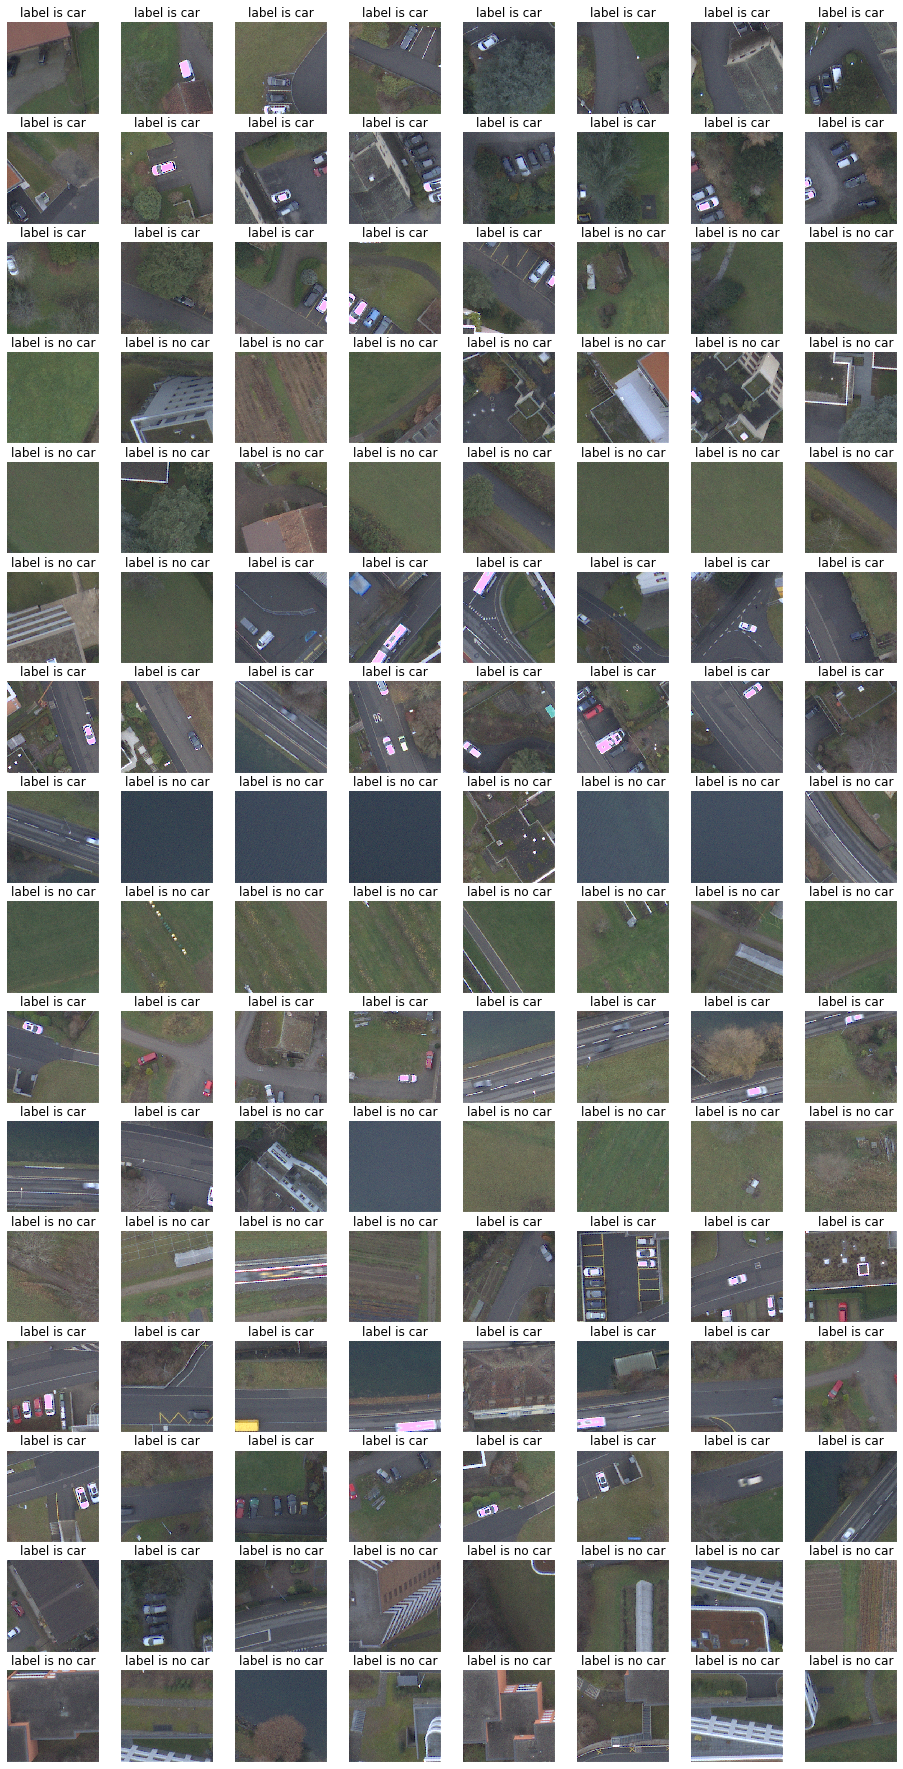

In [4]:
plt.figure(figsize=(16, 32))

for i in range(128):
    sub_img = rgb_dataset[i][0]
    plt.subplot(16, 8, i + 1)
    plt.imshow(sub_img.permute(2,1,0))
    plt.title('label is %s'%(dataset.classes[rgb_dataset[i][1]]))
    plt.axis('off')
    
plt.show()

#### Check StratifiedShuffleSplit

In [6]:
indices = torch.arange(len(dataset))
labels = dataset.labels

for random_state in range(1):
    sss = StratifiedShuffleSplit(n_splits=5, train_size=0.8, random_state=random_state)
    sss.get_n_splits(indices, labels)

    for train_indices, valid_indices in sss.split(indices,labels):
        
        count = 0
        for idx in train_indices:
            if dataset.labels[idx]==1:
                count+=1
                
        print('frac of images with cars:',count/len(train_indices))

frac of images with cars: 0.5
frac of images with cars: 0.5
frac of images with cars: 0.5
frac of images with cars: 0.5
frac of images with cars: 0.5


In [7]:
for random_state in range(5):
    sss = StratifiedShuffleSplit(n_splits=5, train_size=0.8, random_state=random_state)
    sss.get_n_splits(indices, labels)

    for i, (train_indices, valid_indices) in enumerate(sss.split(indices,labels)):
        
        count = 0
        for idx in train_indices:
            if dataset.labels[idx]==1:
                count+=1
                
        print('frac of images with cars in %i-th split:'%(i),count/len(train_indices))

frac of images with cars in 0-th split: 0.5
frac of images with cars in 1-th split: 0.5
frac of images with cars in 2-th split: 0.5
frac of images with cars in 3-th split: 0.5
frac of images with cars in 4-th split: 0.5
frac of images with cars in 0-th split: 0.5
frac of images with cars in 1-th split: 0.5
frac of images with cars in 2-th split: 0.5
frac of images with cars in 3-th split: 0.5
frac of images with cars in 4-th split: 0.5
frac of images with cars in 0-th split: 0.5
frac of images with cars in 1-th split: 0.5
frac of images with cars in 2-th split: 0.5
frac of images with cars in 3-th split: 0.5
frac of images with cars in 4-th split: 0.5
frac of images with cars in 0-th split: 0.5
frac of images with cars in 1-th split: 0.5
frac of images with cars in 2-th split: 0.5
frac of images with cars in 3-th split: 0.5
frac of images with cars in 4-th split: 0.5
frac of images with cars in 0-th split: 0.5
frac of images with cars in 1-th split: 0.5
frac of images with cars in 2-th

### statistics

In [89]:
debayer_algos = ['bilinear', 'malvar2004', 'menon2007']
sharpening_algos = ['sharpening_filter', 'unsharp_masking']
denoising_algos = ['gaussian_denoising', 'median_denoising', 'fft_denoising']

means = None
stds = None

indices = torch.arange(len(dataset))

for i, debayer in enumerate(debayer_algos):
    for j, sharpening in enumerate(sharpening_algos):
        for k, denoising in enumerate(denoising_algos):
            
            print(debayer_algos[i],sharpening_algos[j],denoising_algos[k])
            transform = RawProcessingPipeline(
                    camera_parameters=dataset.camera_parameters,
                    debayer=debayer,
                    sharpening=sharpening,
                    denoising=denoising,
                )
            
            mean, std = get_statistics(dataset, indices, transform=transform)
            mean = torch.squeeze(mean)
            std = torch.squeeze(std)
            print('mean:', mean)
            print('std:',std)
            print('')
            
            if means is None:
                means = mean.unsqueeze(1)
                stds = std.unsqueeze(1)
                
            else:
                means = torch.cat([means,mean.unsqueeze(1)],dim=1)
                stds = torch.cat([stds,std.unsqueeze(1)],dim=1)
                        
print('mean of means:', torch.mean(means,dim=1))
print('std of means:', torch.std(means,dim=1))
print('mean of stds:', torch.mean(stds,dim=1))
print('std of stds:', torch.std(stds,dim=1))


bilinear sharpening_filter gaussian_denoising
mean: tensor([0.3558, 0.3621, 0.3557])
std: tensor([0.1195, 0.1150, 0.1268])

bilinear sharpening_filter median_denoising
mean: tensor([0.3545, 0.3617, 0.3531])
std: tensor([0.1154, 0.1085, 0.1264])

bilinear sharpening_filter fft_denoising
mean: tensor([0.3551, 0.3613, 0.3549])
std: tensor([0.1214, 0.1175, 0.1286])

bilinear unsharp_masking gaussian_denoising
mean: tensor([0.3551, 0.3624, 0.3544])
std: tensor([0.1157, 0.1079, 0.1249])

bilinear unsharp_masking median_denoising
mean: tensor([0.3548, 0.3621, 0.3535])
std: tensor([0.1145, 0.1067, 0.1259])

bilinear unsharp_masking fft_denoising
mean: tensor([0.3551, 0.3622, 0.3546])
std: tensor([0.1156, 0.1084, 0.1246])

malvar2004 sharpening_filter gaussian_denoising
mean: tensor([0.3520, 0.3620, 0.3533])
std: tensor([0.1341, 0.1128, 0.1327])

malvar2004 sharpening_filter median_denoising
mean: tensor([0.3530, 0.3605, 0.3532])
std: tensor([0.1244, 0.1084, 0.1275])

malvar2004 sharpening_fil

## Microscopy images

### proportion of classes

In [38]:
import importlib
import utils.dataset
importlib.reload(utils.dataset)

dataset = get_dataset('Microscopy')
classes = ['BAS', 'EBO', 'EOS', 'KSC', 'LYA', 'LYT', 'MMZ', 'MOB',
                              'MON', 'MYB', 'MYO', 'NGB', 'NGS', 'PMB', 'PMO', 'UNC']
K = len(classes)
frac_all = np.zeros(K)

for idx in range(K):
    if classes[idx] in dataset.valid_classes:
        frac_all[idx] = dataset.labels.count(dataset.valid_classes.index(classes[idx]))

frac_all = np.round(frac_all/len(dataset),4)

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>class</b>','<b>proportion of class in %</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['center','center'],
    font=dict(color='white', size=14)
  ),
  cells=dict(
    values=[['BAS - Basophil',
'EBO - Erythroblast',
'EOS - Eosinophil',
'KSC - Smudge cell',
'LYA - Lymphocyte (atypical)',
'LYT - Lymphocyte (typical)',
'MMZ - Metamyelocyte',
'MOB - Monoblast',
'MON - Monocyte',
'MYB - Myelocyte',
'MYO - Myeloblast',
'NGB - Neutrophil (band)',
'NGS - Neutrophil (segmented)',
'PMB - Promyelocyte (bilobled)',
'PMO - Promyelocyte',
'UNC - Image that could not be assigned a class'],
      frac_all*100],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor]*10],
    align = ['center', 'center'],
    font = dict(color = 'darkslategray', size = 12)
    ))
])

fig.show()
#fig.write_image('/class_proportion.png')

#### check labels and appearance

In [39]:
indices = torch.arange(len(dataset))
transform = RawProcessingPipeline(
                    camera_parameters=dataset.camera_parameters,
                    debayer='bilinear',
                    sharpening='sharpening_filter',
                    denoising='gaussian_denoising',
                )
rgb_dataset = Subset(dataset, indices=indices, transform=transform)

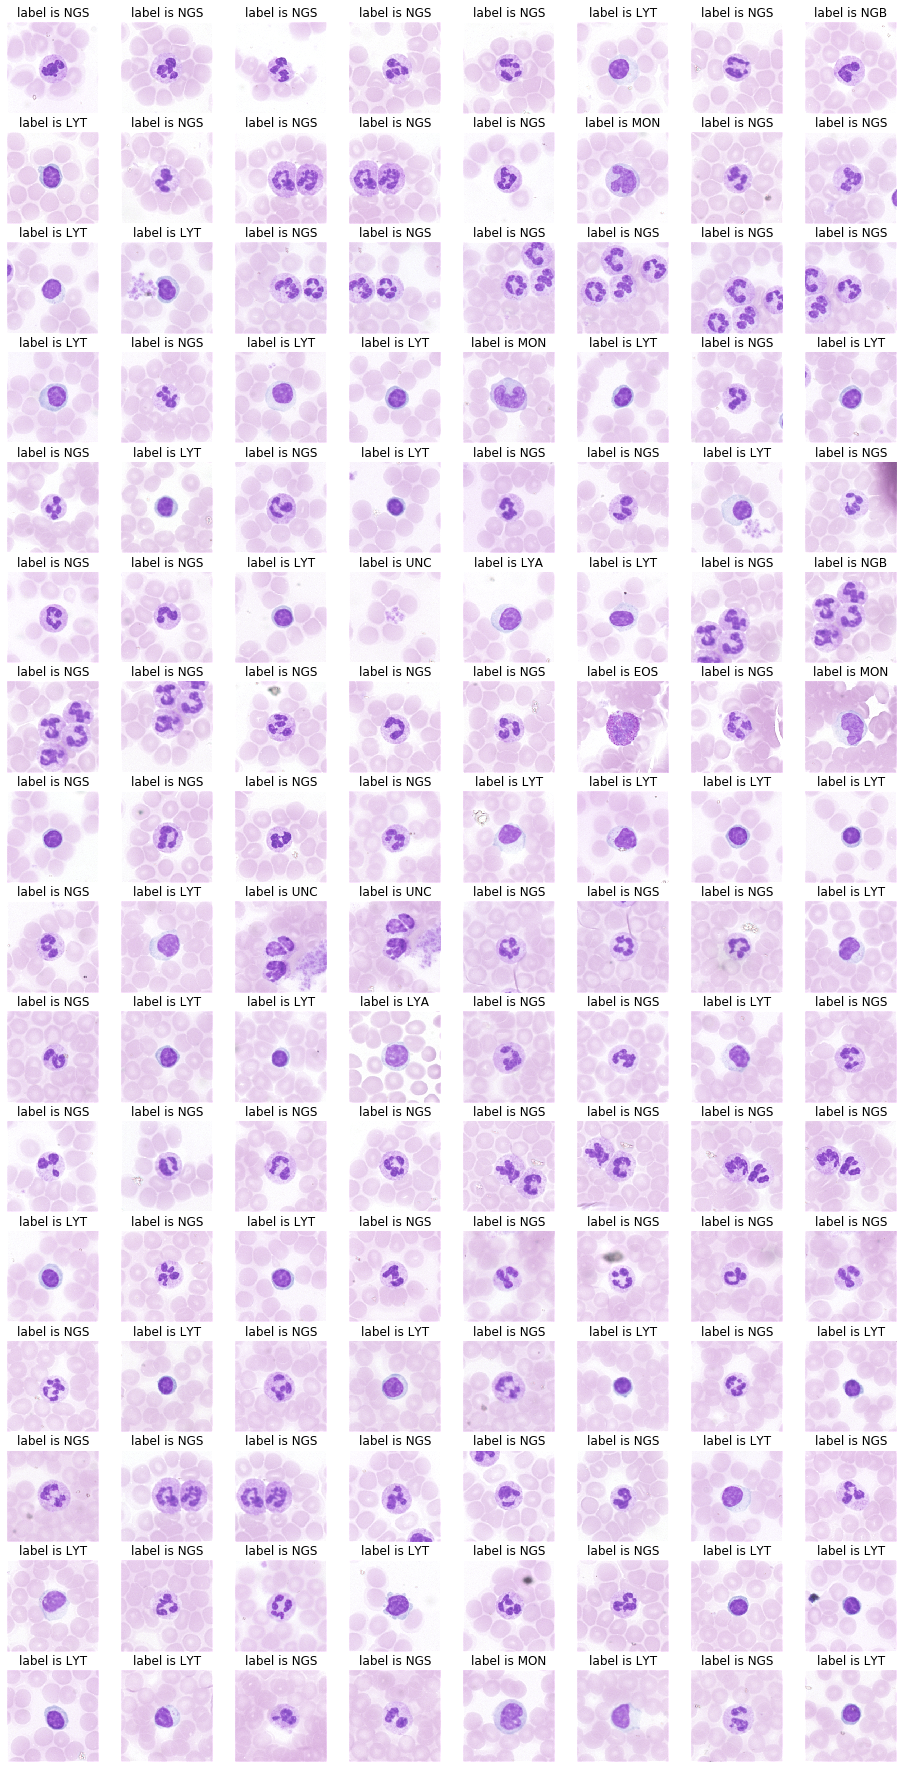

In [40]:
plt.figure(figsize=(16, 32))

for i in range(128):
    sub_img = rgb_dataset[i][0]
    plt.subplot(16, 8, i + 1)
    plt.imshow(sub_img.permute(2,1,0))
    plt.title('label is %s'%(dataset.classes[rgb_dataset[i][1]]))
    plt.axis('off')
    
plt.show()

#### Check StratifiedShuffleSplit

In [42]:
indices = torch.arange(len(dataset))
labels = dataset.labels

for random_state in range(5):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=random_state)
    sss.get_n_splits(indices, labels)
    
    print('FRAC OF IMAGES in %i-th split'%(random_state))
    for train_indices, valid_indices in sss.split(indices,labels):
        
        N = len(dataset.classes)
        train_labels = [0]*N
        for idx in train_indices:
            train_labels[dataset.labels[idx]] +=1
        
        valid_labels = [0]*N
        for idx in valid_indices:
            valid_labels[dataset.labels[idx]] +=1
        
        n1 = len(train_indices)
        n2 = len(valid_indices)
        for k, (train_app,test_app) in enumerate(zip(train_labels,valid_labels)):
            print('frac of images in train set with label %s:'%(dataset.classes[k]),train_app/n1)
            print('frac of images in test set with label %s:'%(dataset.classes[k]),test_app/n2)
            print('')

FRAC OF IMAGES in 0-th split
frac of images in train set with label EOS: 0.03618421052631579
frac of images in test set with label EOS: 0.03896103896103896

frac of images in train set with label KSC: 0.08223684210526316
frac of images in test set with label KSC: 0.07792207792207792

frac of images in train set with label LYA: 0.023026315789473683
frac of images in test set with label LYA: 0.025974025974025976

frac of images in train set with label LYT: 0.22697368421052633
frac of images in test set with label LYT: 0.23376623376623376

frac of images in train set with label MON: 0.17105263157894737
frac of images in test set with label MON: 0.16883116883116883

frac of images in train set with label NGB: 0.01644736842105263
frac of images in test set with label NGB: 0.012987012987012988

frac of images in train set with label NGS: 0.41118421052631576
frac of images in test set with label NGS: 0.4025974025974026

frac of images in train set with label UNC: 0.03289473684210526
frac of i

In [43]:
indices = torch.arange(len(dataset))
labels = dataset.labels

for random_state in range(5):
    sss = StratifiedShuffleSplit(n_splits=5, train_size=0.2, random_state=random_state)
    sss.get_n_splits(indices, labels)

    for train_indices, valid_indices in sss.split(indices,labels):
        
        N = len(dataset.classes)
        train_labels = [0]*N
        for idx in train_indices:
            train_labels[dataset.labels[idx]] +=1
        
        valid_labels = [0]*N
        for idx in valid_indices:
            valid_labels[dataset.labels[idx]] +=1
        
        n1 = len(train_indices)
        n2 = len(valid_indices)
        for k, (train_app,test_app) in enumerate(zip(train_labels,valid_labels)):
            print('frac of images in train set with label %s:'%(dataset.classes[k]),train_app/n1)
            print('frac of images in test set with label %s:'%(dataset.classes[k]),test_app/n2)
            print('')

frac of images in train set with label EOS: 0.039473684210526314
frac of images in test set with label EOS: 0.036065573770491806

frac of images in train set with label KSC: 0.07894736842105263
frac of images in test set with label KSC: 0.08196721311475409

frac of images in train set with label LYA: 0.02631578947368421
frac of images in test set with label LYA: 0.022950819672131147

frac of images in train set with label LYT: 0.2236842105263158
frac of images in test set with label LYT: 0.22950819672131148

frac of images in train set with label MON: 0.17105263157894737
frac of images in test set with label MON: 0.17049180327868851

frac of images in train set with label NGB: 0.013157894736842105
frac of images in test set with label NGB: 0.01639344262295082

frac of images in train set with label NGS: 0.40789473684210525
frac of images in test set with label NGS: 0.4098360655737705

frac of images in train set with label UNC: 0.039473684210526314
frac of images in test set with label

In [119]:
debayer_algos = ['bilinear', 'malvar2004', 'menon2007']
sharpening_algos = ['sharpening_filter', 'unsharp_masking']
denoising_algos = ['gaussian_denoising', 'median_denoising', 'fft_denoising']

means = None
stds = None

indices = torch.arange(len(dataset))

for i, debayer in enumerate(debayer_algos):
    for j, sharpening in enumerate(sharpening_algos):
        for k, denoising in enumerate(denoising_algos):
            
            print(debayer_algos[i],sharpening_algos[j],denoising_algos[k])
            transform = RawProcessingPipeline(
                    camera_parameters=dataset.camera_parameters,
                    debayer=debayer,
                    sharpening=sharpening,
                    denoising=denoising,
                )
            
            mean, std = get_statistics(dataset, indices, transform=transform)
            mean = torch.squeeze(mean)
            std = torch.squeeze(std)
            print('mean:', mean)
            print('std:',std)
            print('')
            
            if means is None:
                means = mean.unsqueeze(1)
                stds = std.unsqueeze(1)
                
            else:
                means = torch.cat([means,mean.unsqueeze(1)],dim=1)
                stds = torch.cat([stds,std.unsqueeze(1)],dim=1)
                        
print('mean of means:', torch.mean(means,dim=1))
print('std of means:', torch.std(means,dim=1))
print('mean of stds:', torch.mean(stds,dim=1))
print('std of stds:', torch.std(stds,dim=1))

bilinear sharpening_filter gaussian_denoising
mean: tensor([0.9154, 0.8389, 0.9394])
std: tensor([0.0731, 0.1169, 0.0413])

bilinear sharpening_filter median_denoising
mean: tensor([0.9139, 0.8378, 0.9383])
std: tensor([0.0735, 0.1155, 0.0409])

bilinear sharpening_filter fft_denoising
mean: tensor([0.9146, 0.8381, 0.9385])
std: tensor([0.0742, 0.1182, 0.0425])

bilinear unsharp_masking gaussian_denoising
mean: tensor([0.9135, 0.8368, 0.9377])
std: tensor([0.0725, 0.1136, 0.0410])

bilinear unsharp_masking median_denoising
mean: tensor([0.9137, 0.8369, 0.9372])
std: tensor([0.0721, 0.1134, 0.0432])

bilinear unsharp_masking fft_denoising
mean: tensor([0.9137, 0.8368, 0.9379])
std: tensor([0.0723, 0.1138, 0.0404])

malvar2004 sharpening_filter gaussian_denoising
mean: tensor([0.9135, 0.8369, 0.9356])
std: tensor([0.0758, 0.1219, 0.0552])

malvar2004 sharpening_filter median_denoising
mean: tensor([0.9093, 0.8360, 0.9371])
std: tensor([0.0903, 0.1137, 0.0477])

malvar2004 sharpening_filt